# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [44]:
import os
import glob
import pandas as pd
# Current working directory that contains your dataset and code file
os.chdir(r"C:\\Users\\David-Daniel\\Downloads\\UStacky\\Data-Analysis-Project")


#### To-Do - Use glob to match the pattern "csv"

In [45]:
extension = 'csv'
#[Write your Code Here]
path = os.getcwd() + "/*." + extension
glob_list = glob.glob(path)


#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [46]:
#[Write your Code Here]
new = []

for list in range(len(glob_list)):
    new.append(pd.read_csv(glob_list[list]))

data = pd.concat(new)
#Export to csv
#[Write your Code Here]
data.to_csv("fulldata.csv")


#### To-Do -Read the CSV file using `pd.read_csv` method

In [47]:
#[Write your Code Here]
full_data = pd.read_csv("fulldata.csv")


## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')  
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

#### To-Do - Use the head() method to view first few rows of the dataset

In [50]:
#[Write your Code Here]
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [51]:
#[Write your Code Here]
print(f"Number of Columns: {data.shape[1]}")
print(f"Number of Rows: {data.shape[0]}")


Number of Columns: 17
Number of Rows: 1000


#### To-Do - Generate the names of the columns using the columns attribute.

In [52]:
#[Write your Code Here]
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [53]:
#[Write your Code Here]
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

#### From the description of the data above is can be induced that:
#### 1. Customers spent an average of 110,731 naira on a particular good 
#### 2. The minimum amount spent by customers is 3661 naira
#### 3. The good with the highest price costs 35,985.60 naira
#### 4. The maximum amounts of units purchased for a commodity is 10
#### 5. The minimum amount of units of a commodity purchased by a customer is 1
#### 6. The highest tax payable on a commodity is 17,874 naira
#### 7. The Lowest tax payable on a commodity is 183 naira


#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [54]:
#[Write your Code Here]
data.isnull().sum()
data.notna().sum()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [55]:
#[Write your Code Here]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [56]:
#[Write your Code Here]
data['Date'] = pd.to_datetime(data['Date'], yearfirst=True)

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [57]:
#[Write your Code Here]
data['Date'].dtype

dtype('<M8[ns]')

#### To-Do - Repeat the two steps above to the `time` column

In [58]:
#[Write your Code Here]
data['Time'] = pd.to_datetime(data['Time']).dt.time
# data['Time'].dtype
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,17:03:00,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,16:19:00,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,15:30:00,Epay,29016.0,4.761905,1450.80,4.4


## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [59]:
#[Write your Code Here]

data['Day'] = data['Date'].dt.day
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,13:27:00,Card,59227.2,4.761905,2961.36,5.9,20
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11


#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [60]:
#[Write your Code Here]
data['Month'] = data['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [61]:
#[Write your Code Here]
data['Year'] = data['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [62]:
#[Write your Code Here]
data['Hour'] = data['Date'].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [70]:
#[Write your Code Here]
print('Number of Unique Hours of Sales: ' + str(data['Hour'].nunique()))

Number of Unique Hours of Sales: 1


In [71]:
#[Write your Code Here]
print(data['Hour'].unique())


[0]


## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [72]:
#Uncomment the code and Run it
categorical_columns = [col for col in data.columns if data[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Time',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [74]:
#Example - Uncomment the Code and Run it
data['Branch'].unique().tolist()

['B', 'A', 'C']

In [76]:
print("Total Number of unique values in the Branch Column : {}". format(len(data['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [82]:
#[Write Your Code Here]
for col in categorical_columns:
    if col != ('Branch'):
        print("Total Number of Unique Values in the {} column: {}".format(col, len(data[col].unique().tolist())), end="\n")
        

Total Number of Unique Values in the Invoice ID column: 1000
Total Number of Unique Values in the City column: 3
Total Number of Unique Values in the Customer type column: 2
Total Number of Unique Values in the Gender column: 2
Total Number of Unique Values in the Product line column: 6
Total Number of Unique Values in the Time column: 506
Total Number of Unique Values in the Payment column: 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [84]:
#Example
data['City'].value_counts()

for column in categorical_columns:
    print(data[column].value_counts(), end='\n')

257-73-1380    1
263-10-3913    1
608-05-3804    1
139-20-0155    1
870-54-3162    1
              ..
595-27-4851    1
227-07-4446    1
809-46-1866    1
811-03-8790    1
227-03-5010    1
Name: Invoice ID, Length: 1000, dtype: int64
A    340
B    332
C    328
Name: Branch, dtype: int64
Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
19:48:00    7
14:42:00    7
17:38:00    6
19:39:00    5
19:44:00    5
           ..
17:12:00    1
10:10:00    1
14:57:00    1
20:39:00    1
13:19:00    1
Name: Time, Length: 506, dtype: int64
Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64


## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [85]:
#[Write your Code Here]
data.groupby('City').agg(['sum', 'mean'])

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating             Day            Month  \
                        mean  ...     sum      mean   sum       mean   sum   
City                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           Year       Hour       
                   mean     sum  mean  sum mean  
City                                             
Abuja          2.003012  670308  2019    0    0  
Lagos          2.023529  686460  2019    0    0  
Port Harcourt  1.951220  662232  2019    0    0  

[3 rows x 24 columns]

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [114]:
#[Write your Code Here]
gross_income= data.groupby(['City'])['gross income'].agg(['sum'])

In [115]:
# [Write your Answer Here]
gross_income[gross_income['sum'] == gross_income['sum'].max()]

,sum
City,
Port Harcourt,1895463.54


In [117]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [124]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 
unit_price = data.groupby(['City'])['Unit price'].agg(['sum'])
print(unit_price[unit_price['sum'] == unit_price['sum'].max()])
print('\n')
quantity = data.groupby(['City'])['Quantity'].agg(['sum'])
print(quantity[quantity['sum'] == quantity['sum'].max()])


             sum
City            
Lagos  6705176.4


        sum
City       
Lagos  1859


## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

Text(0.5, 1.0, 'Branch With Highest Sales Record')

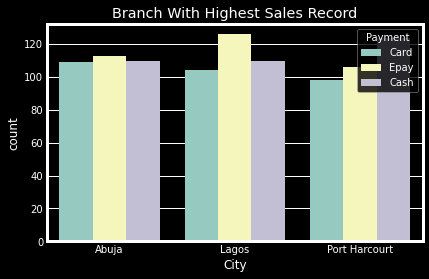

In [144]:
#[Write your Code Here]
sns.countplot(x='City', hue='Payment', data=data).set_title("Branch With Highest Sales Record")

#### Explore a countplot for the `Payment` and `City` Column

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0.5, 1.0, 'Product Line Sales')

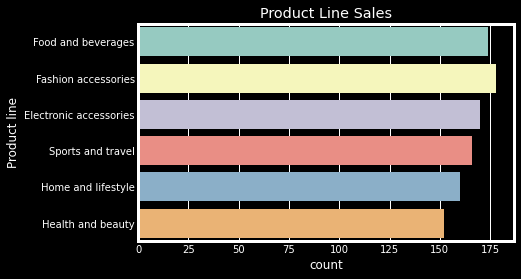

In [146]:
#[Write your Code Here]
sns.countplot(y='Product line', data=data).set_title("Product Line Sales")

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'Product Line Sales')

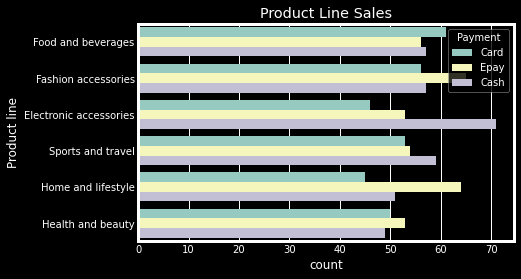

In [147]:
#[Write your Code Here]
sns.countplot(y='Product line', data=data, hue='Payment').set_title("Product Line Sales")


#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

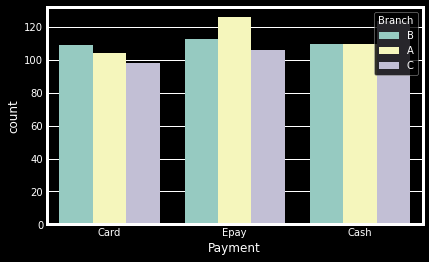

In [148]:
#[Write your Code Here]
sns.countplot(x='Payment', data=data, hue='Branch')

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

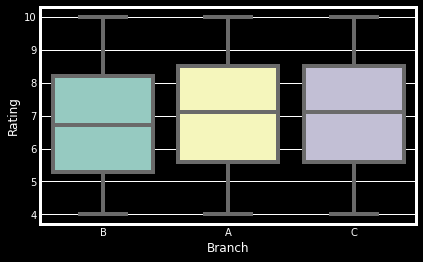

In [149]:
#[Write your Code Here]
sns.boxplot(x="Branch", y="Rating", data=data)

In [ ]:
#[Write your answer here]

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

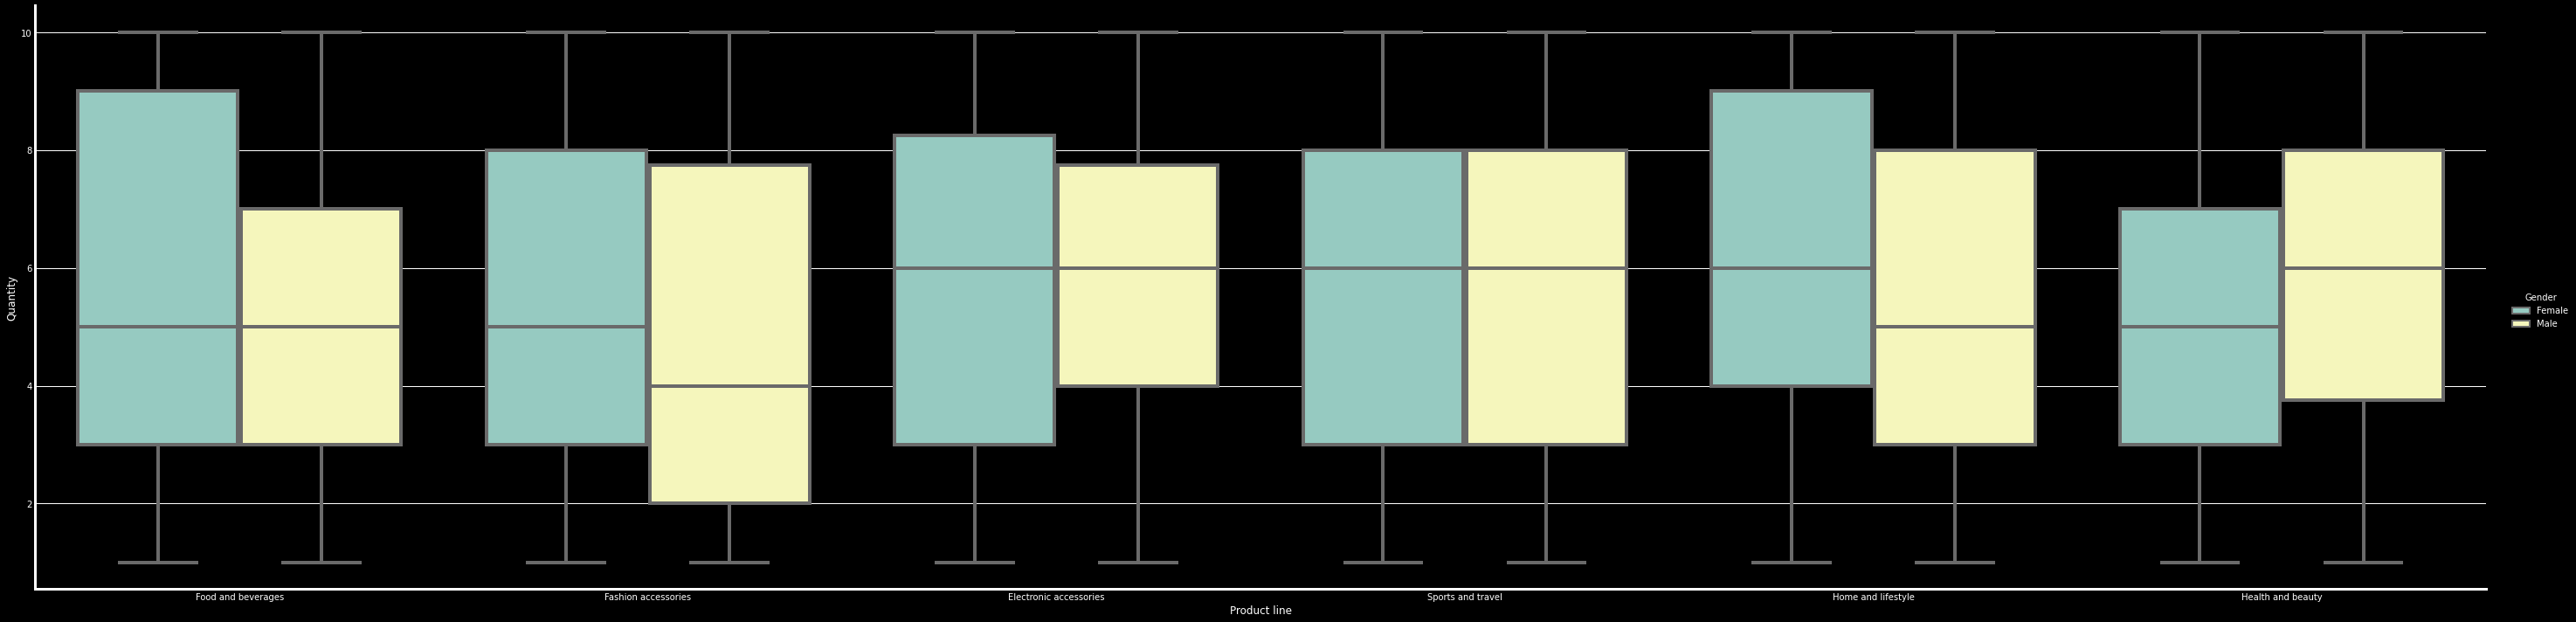

In [162]:
#[Write your Code Here]
sns.catplot(y="Quantity", x='Product line', data=data, hue='Gender',aspect=4, height=10, kind='box')

#### From the plot above it can be seen that:
* Females bought products in the food and beverages in larger quantities than males
* Males bought products from the fashion accessories product line more than females though they bought them in lower quantities
* Females bought larger quantities of electronic accessories than males
* Males and Females bought equal quantities of sport and travel products
* Females bought home and lifestyle products in larger quantities than males
* Males bought health and beauty products in larger quantites than females

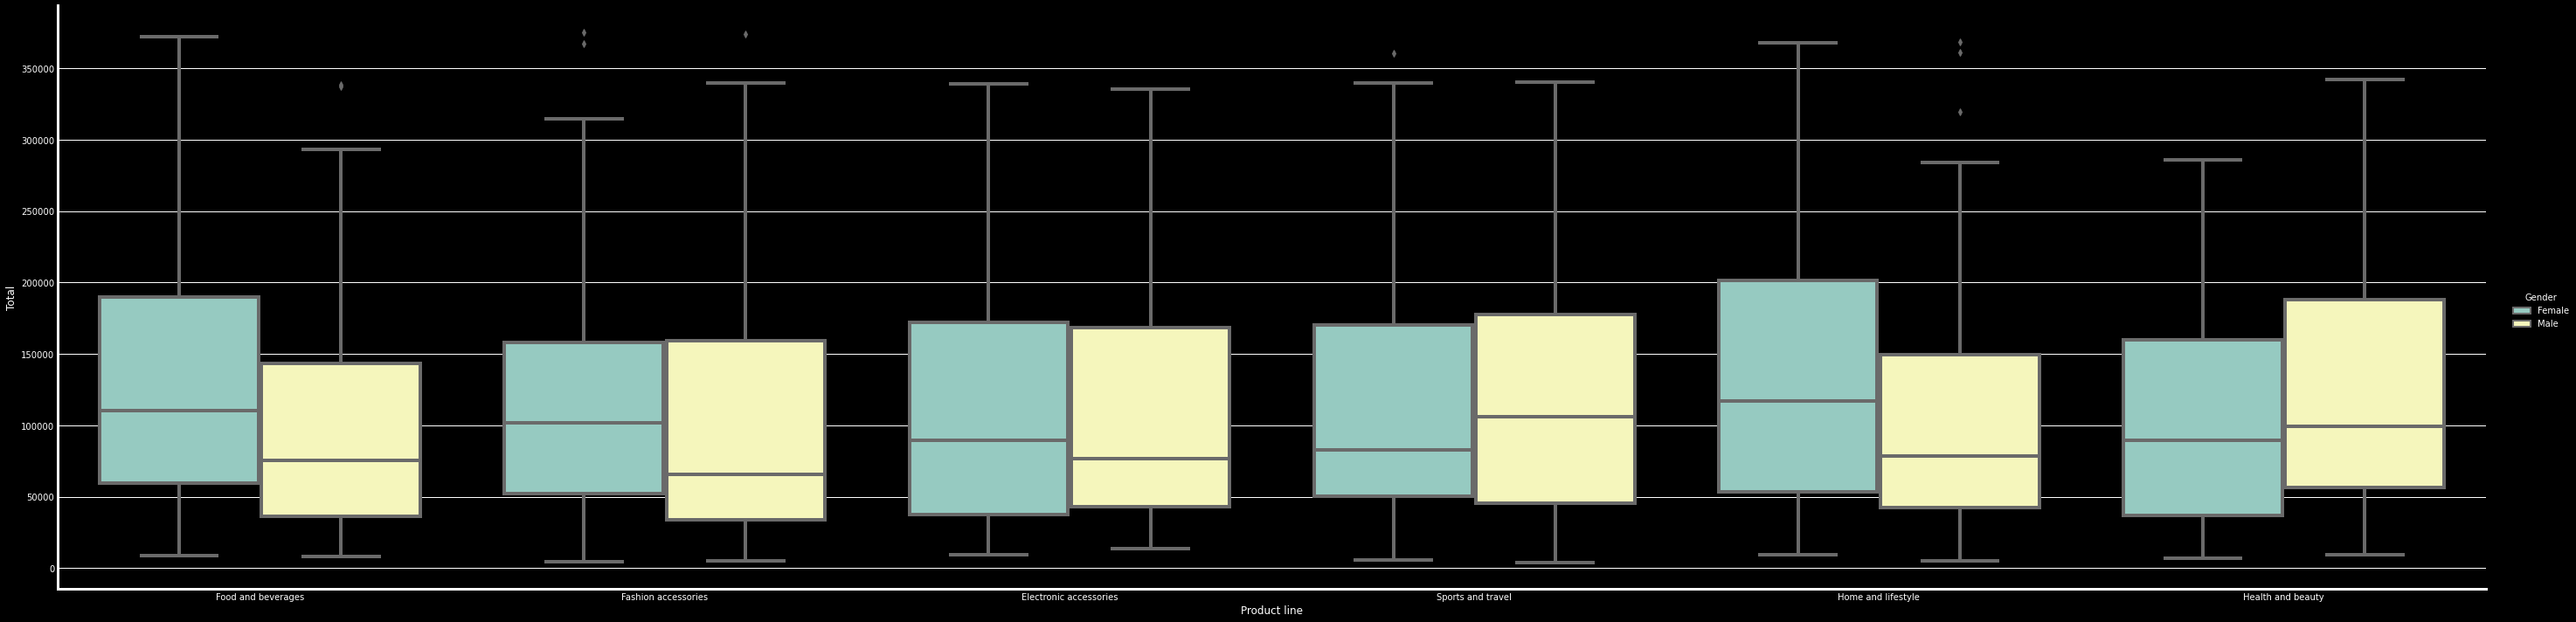

In [163]:
#[Write your Code Here]
sns.catplot(y="Total", x='Product line', data=data,
            hue='Gender', aspect=4, height=10, kind='box')


## From the plot above we can say:
* In total females bought  more products in the food and beverages line.
* The total minimum amount spent by females in the fashion and accessories line is higher than males with their maximum amount spent being nearly equal.
* The total minimum and maximum spent by both males and females in the electronics accessories products line are nearly equal.
* The total minimum and maximum spent by females in the sports and travel products line are slightly higher than males.
* The total minimum and maximum spent by females in the home and lifestyle products line are  higher than males.
* The total minimum and maximum spent by females in the electronics accessories products line are lower than males.

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

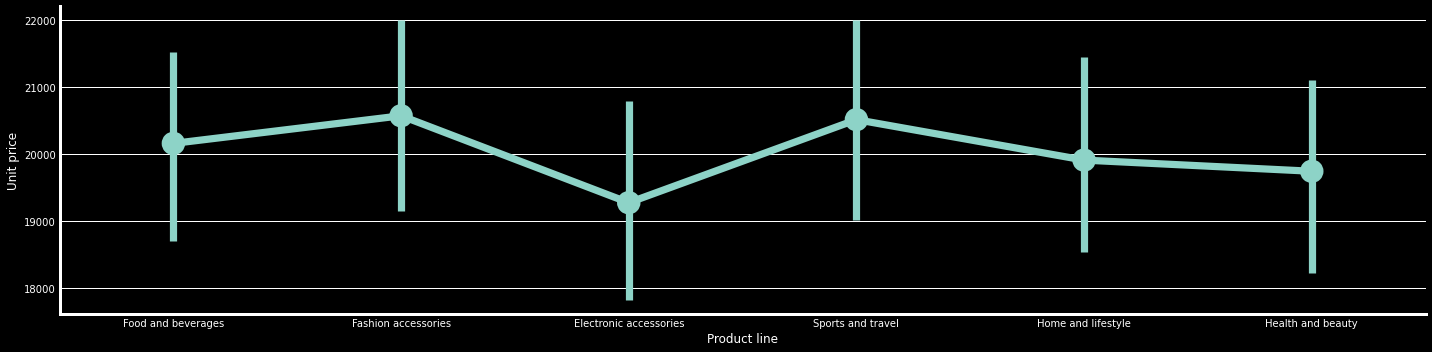

In [165]:
#[Write your Code Here]
sns.catplot(x='Product line', y='Unit price', data=data, kind='point', aspect=4)

#### Here we can see that products in the fashion accessories and sports and travel lines have higher unit prices than other lines, 
#### we can also see that of all the product lines the electronics accessories line has the lowest unit prices

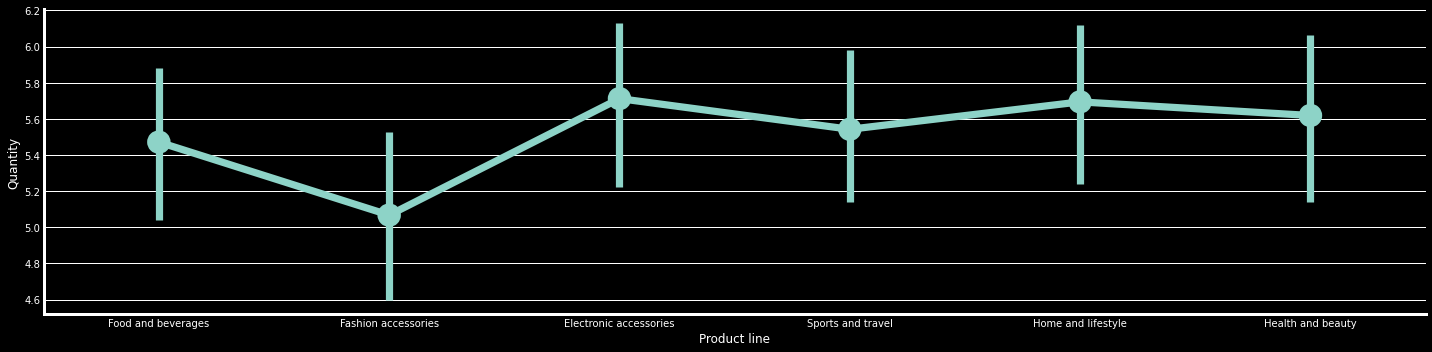

In [167]:
#[Write your Code Here]
sns.catplot(x='Product line', y='Quantity', data=data, kind='point', aspect=4)

#### We can see from this plot that compared to other product lines the fashion accessories product line was purchased in the lowest quantities

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


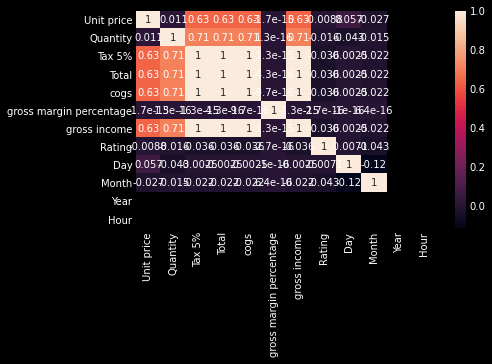

In [169]:
sns.heatmap(data.corr(), annot=True)

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 